In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [7]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)

(9000, 32, 32, 3)


In [8]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [9]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [10]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [11]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)

(9000, 32, 32, 3)


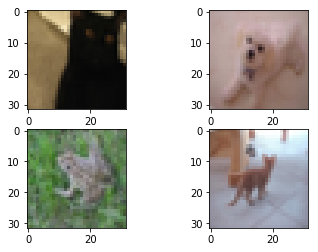

In [12]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [13]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 64
epochs = 100
no_estimators = 5

In [16]:
# create CNN 6 conv layer & 2 Maxpooling layer
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
    
    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    
    
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    '''
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    '''
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
    return model

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Instructions for updating:
Use tf.cast instead.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 15s - loss: 9.6697 - acc: 0.4838 - val_loss: 2.6274 - val_acc: 0.5273
Epoch 2/100
 - 4s - loss: 1.7964 - acc: 0.5578 - val_loss: 1.3801 - val_acc: 0.5727
Epoch 3/100
 - 5s - loss: 1.4294 - acc: 0.5739 - val_loss: 1.4868 - val_acc: 0.5317
Epoch 4/100
 - 4s - loss: 1.2953 - acc: 0.5976 - val_loss: 1.3167 - val_acc: 0.5767
Epoch 5/100
 - 5s - loss: 1.2370 - acc: 0.6272 - val_loss: 1.2551 - val_acc: 0.6247
Epoch 6/100
 - 5s - loss: 1.2081 - acc: 0.6406 - val_loss: 1.4531 - val_acc: 0.5400
Epoch 7/100
 - 4s - loss: 1.1757 - acc: 0.6590 - val_loss: 1.2036 - val_acc: 0.5827
Epoch 8/100
 - 4s - loss: 1.1607 - acc: 0.6654 - val_loss: 1.2783 - val_acc: 0.6160
Epoch 9/100
 - 4s - loss: 1.1328 - acc: 0.6744 - val_loss: 1.1858 - val_acc: 0.6170
Epoch 10/100
 - 4s - loss: 1.1372 - acc: 0.6908 - val_loss: 1.1896 - val_acc: 0.6320
Epoch 11/100
 - 4s - loss: 1.1286 - acc: 0.7051 - val_loss: 1.1610 - val_acc: 0.6507
Epoch 12/100
 - 4s - loss

Epoch 97/100
 - 4s - loss: 0.1799 - acc: 0.9753 - val_loss: 1.5048 - val_acc: 0.7117
Epoch 98/100
 - 5s - loss: 0.1893 - acc: 0.9728 - val_loss: 1.6356 - val_acc: 0.6827
Epoch 99/100
 - 4s - loss: 0.1849 - acc: 0.9748 - val_loss: 1.5583 - val_acc: 0.7023
Epoch 100/100
 - 4s - loss: 0.1699 - acc: 0.9758 - val_loss: 1.4510 - val_acc: 0.7193
3000/3000 [==============================] - 1s 178us/step

Test Accuracy: 0.8153


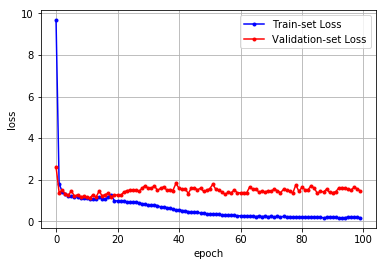

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 11s - loss: 9.6019 - acc: 0.4852 - val_loss: 2.5569 - val_acc: 0.5607
Epoch 2/100
 - 4s - loss: 1.7866 - acc: 0.5574 - val_loss: 1.5071 - val_acc: 0.5410
Epoch 3/100
 - 4s - loss: 1.3862 - acc: 0.5914 - val_loss: 1.4062 - val_acc: 0.5583
Epoch 4/100
 - 4s - loss: 1.3068 - acc: 0.6050 - val_loss: 1.3883 - val_acc: 0.5567
Epoch 5/100
 - 4s - loss: 1.2509 - acc: 0.6262 - val_loss: 1.2219 - val_acc: 0.6093
Epoch 6/100
 - 4s - loss: 1.1796 - acc: 0.6429 - val_loss: 1.1886 - val_acc: 0.6037
Epoch 7/100
 - 4s - loss: 1.1776 - acc: 0.6516 - val_loss: 1.3171 - val_acc: 0.6137
Epoch 8/100
 - 4s - loss: 1.1585 - acc: 0.6619 - val_loss: 1.2131 - val_acc: 0.6250
Epoch 9/100
 - 4s - loss: 1.1067 - acc: 0.6808 - val_loss: 1.1605 - val_acc: 0.6440
Epoch 10/100
 - 5s - loss: 1.0988 - acc: 0.6854 - val_loss: 1.2076 - val_acc: 0.6183
Epoch 11/100
 - 4s - loss: 1.0753 - acc: 0.6986 - val_loss: 1.1676 - val_acc: 0.6530
Epoch 12/100
 - 4s - loss

Epoch 97/100
 - 4s - loss: 0.1708 - acc: 0.9732 - val_loss: 1.6658 - val_acc: 0.6890
Epoch 98/100
 - 4s - loss: 0.1665 - acc: 0.9733 - val_loss: 1.4212 - val_acc: 0.7177
Epoch 99/100
 - 4s - loss: 0.1491 - acc: 0.9793 - val_loss: 1.8364 - val_acc: 0.6827
Epoch 100/100
 - 4s - loss: 0.1704 - acc: 0.9763 - val_loss: 1.5159 - val_acc: 0.7170
3000/3000 [==============================] - 0s 152us/step

Test Accuracy: 0.8133


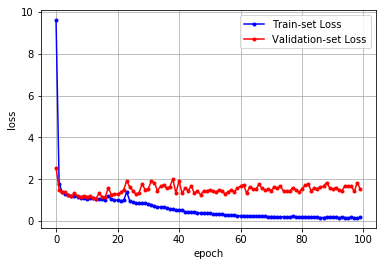

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 11s - loss: 9.8145 - acc: 0.4794 - val_loss: 2.5762 - val_acc: 0.5390
Epoch 2/100
 - 5s - loss: 1.7614 - acc: 0.5651 - val_loss: 2.1965 - val_acc: 0.4157
Epoch 3/100
 - 5s - loss: 1.3825 - acc: 0.5877 - val_loss: 1.3786 - val_acc: 0.5633
Epoch 4/100
 - 4s - loss: 1.2817 - acc: 0.6096 - val_loss: 1.1602 - val_acc: 0.6177
Epoch 5/100
 - 4s - loss: 1.2410 - acc: 0.6356 - val_loss: 1.1918 - val_acc: 0.6043
Epoch 6/100
 - 5s - loss: 1.2122 - acc: 0.6392 - val_loss: 1.2233 - val_acc: 0.6217
Epoch 7/100
 - 5s - loss: 1.2049 - acc: 0.6510 - val_loss: 1.1742 - val_acc: 0.6320
Epoch 8/100
 - 5s - loss: 1.1647 - acc: 0.6662 - val_loss: 1.1975 - val_acc: 0.6413
Epoch 9/100
 - 5s - loss: 1.1426 - acc: 0.6824 - val_loss: 1.1786 - val_acc: 0.6480
Epoch 10/100
 - 5s - loss: 1.1508 - acc: 0.6976 - val_loss: 1.1749 - val_acc: 0.6500
Epoch 11/100
 - 5s - loss: 1.1130 - acc: 0.7128 - val_loss: 1.2807 - val_acc: 0.6330
Epoch 12/100
 - 4s - loss

Epoch 97/100
 - 5s - loss: 0.1695 - acc: 0.9774 - val_loss: 1.5459 - val_acc: 0.7087
Epoch 98/100
 - 5s - loss: 0.1845 - acc: 0.9746 - val_loss: 1.5181 - val_acc: 0.7147
Epoch 99/100
 - 5s - loss: 0.1803 - acc: 0.9758 - val_loss: 1.2931 - val_acc: 0.7247
Epoch 100/100
 - 5s - loss: 0.1766 - acc: 0.9772 - val_loss: 1.7835 - val_acc: 0.6963
3000/3000 [==============================] - 1s 169us/step

Test Accuracy: 0.8027


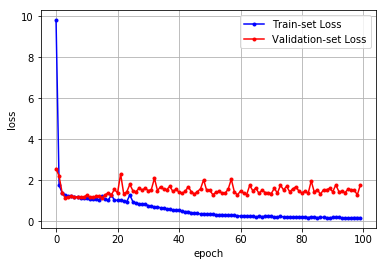

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 10s - loss: 9.7975 - acc: 0.4778 - val_loss: 2.7168 - val_acc: 0.5373
Epoch 2/100
 - 4s - loss: 1.8653 - acc: 0.5544 - val_loss: 1.5730 - val_acc: 0.5000
Epoch 3/100
 - 4s - loss: 1.3798 - acc: 0.5829 - val_loss: 1.3027 - val_acc: 0.5890
Epoch 4/100
 - 4s - loss: 1.3204 - acc: 0.6044 - val_loss: 1.3166 - val_acc: 0.5793
Epoch 5/100
 - 4s - loss: 1.2339 - acc: 0.6296 - val_loss: 1.2405 - val_acc: 0.6120
Epoch 6/100
 - 4s - loss: 1.2551 - acc: 0.6482 - val_loss: 1.2059 - val_acc: 0.6253
Epoch 7/100
 - 4s - loss: 1.2024 - acc: 0.6472 - val_loss: 1.1516 - val_acc: 0.6590
Epoch 8/100
 - 4s - loss: 1.1734 - acc: 0.6676 - val_loss: 1.2554 - val_acc: 0.6523
Epoch 9/100
 - 4s - loss: 1.1639 - acc: 0.6797 - val_loss: 1.1857 - val_acc: 0.6763
Epoch 10/100
 - 4s - loss: 1.2341 - acc: 0.6872 - val_loss: 1.2026 - val_acc: 0.6573
Epoch 11/100
 - 4s - loss: 1.0926 - acc: 0.7007 - val_loss: 1.2263 - val_acc: 0.6110
Epoch 12/100
 - 4s - loss

Epoch 97/100
 - 5s - loss: 0.1896 - acc: 0.9750 - val_loss: 1.2811 - val_acc: 0.7317
Epoch 98/100
 - 4s - loss: 0.1753 - acc: 0.9782 - val_loss: 1.5007 - val_acc: 0.7153
Epoch 99/100
 - 4s - loss: 0.1797 - acc: 0.9758 - val_loss: 1.3757 - val_acc: 0.7227
Epoch 100/100
 - 5s - loss: 0.1962 - acc: 0.9724 - val_loss: 1.4384 - val_acc: 0.7197
3000/3000 [==============================] - 0s 162us/step

Test Accuracy: 0.8040


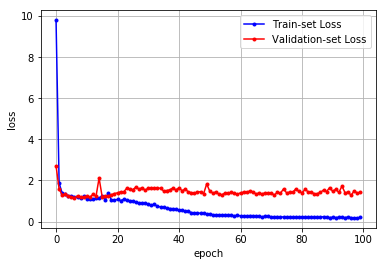

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 11s - loss: 9.2241 - acc: 0.4854 - val_loss: 2.3687 - val_acc: 0.5350
Epoch 2/100
 - 4s - loss: 1.7809 - acc: 0.5637 - val_loss: 1.4367 - val_acc: 0.5897
Epoch 3/100
 - 5s - loss: 1.4352 - acc: 0.5832 - val_loss: 1.4824 - val_acc: 0.5357
Epoch 4/100
 - 4s - loss: 1.2900 - acc: 0.6147 - val_loss: 1.4043 - val_acc: 0.5890
Epoch 5/100
 - 5s - loss: 1.2476 - acc: 0.6311 - val_loss: 1.4401 - val_acc: 0.5443
Epoch 6/100
 - 4s - loss: 1.2403 - acc: 0.6479 - val_loss: 1.4451 - val_acc: 0.5500
Epoch 7/100
 - 5s - loss: 1.2546 - acc: 0.6600 - val_loss: 1.2924 - val_acc: 0.5950
Epoch 8/100
 - 5s - loss: 1.1768 - acc: 0.6683 - val_loss: 1.2065 - val_acc: 0.6383
Epoch 9/100
 - 5s - loss: 1.2028 - acc: 0.6817 - val_loss: 1.3060 - val_acc: 0.6637
Epoch 10/100
 - 4s - loss: 1.1566 - acc: 0.7009 - val_loss: 1.1474 - val_acc: 0.6843
Epoch 11/100
 - 5s - loss: 1.1500 - acc: 0.7083 - val_loss: 1.1845 - val_acc: 0.6630
Epoch 12/100
 - 5s - loss

Epoch 97/100
 - 4s - loss: 0.1943 - acc: 0.9719 - val_loss: 1.4106 - val_acc: 0.7093
Epoch 98/100
 - 5s - loss: 0.1747 - acc: 0.9743 - val_loss: 1.4716 - val_acc: 0.7123
Epoch 99/100
 - 4s - loss: 0.1773 - acc: 0.9754 - val_loss: 1.4212 - val_acc: 0.7230
Epoch 100/100
 - 5s - loss: 0.1682 - acc: 0.9766 - val_loss: 1.4285 - val_acc: 0.7083
3000/3000 [==============================] - 1s 168us/step

Test Accuracy: 0.8127


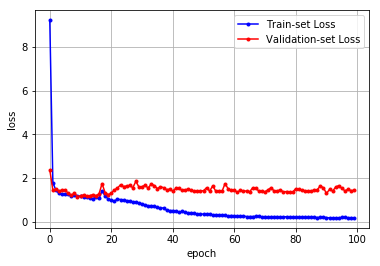

In [17]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_8/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=64, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [18]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_8/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.72 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99666667 0.93466667 0.99322222 0.994      0.99622222]
Validation Acc: [0.725      0.72366667 0.72866667 0.734      0.72933333]
Test Acc: [0.82266667 0.79566667 0.817      0.80533333 0.827     ]
[ True  True  True  True  True]


In [19]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_8/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 23.80%
Ensemble Validation_Accuracy: 76.20%
Ensemble Test_Error: 12.67%
Ensemble Test_Accuracy: 87.33%


In [ ]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_8/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])